In [2]:
#India Exports Project. 

In [2]:
#Import Data
import pandas as pd
df= pd.read_csv("C:/Users/Data Nerd/Downloads/Export_Data.csv")

our research questions or want to achieve after our study. 

1. Top exports by country and volume.
2  General trend of the exports over the years.
3. How can they maximise revenue. (Just ideas and explore the data)
4. A model to predict the volume of imports. 

The data is very limited. There is not much we can do but lets see what we can do. I have not completed, i will still keep making edits on the document. Right now i want momentum, one project every week. 


In [3]:
df.head()

,ROWID,Country,SourceYear,Name of the export country,Export value,YearCode,Year
0,1,India,1996-97,FR POLYNESIA,0.26,1996,"Financial Year (Apr - Mar), 1996"
1,2,India,1996-97,PACIFIC IS,1.52,1996,"Financial Year (Apr - Mar), 1996"
2,3,India,1996-97,MONTSERRAT,1.54,1996,"Financial Year (Apr - Mar), 1996"
3,4,India,1996-97,PITCAIRN IS.,1.88,1996,"Financial Year (Apr - Mar), 1996"
4,5,India,1996-97,TIMOR LESTE,3.47,1996,"Financial Year (Apr - Mar), 1996"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6070 entries, 0 to 6069
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ROWID                       6070 non-null   int64  
 1   Country                     6070 non-null   object 
 2   SourceYear                  6070 non-null   object 
 3   Name of the export country  6070 non-null   object 
 4   Export value                5989 non-null   float64
 5   YearCode                    6070 non-null   int64  
 6   Year                        6070 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 332.1+ KB


In [5]:
#Check for Missing Values. Before dropping rows with null values.
df.isnull().sum()

ROWID                          0
Country                        0
SourceYear                     0
Name of the export country     0
Export value                  81
YearCode                       0
Year                           0
dtype: int64

In [6]:
#Drop Rows with Missing Values.
df= df.dropna()

In [7]:
#Check for Missing Values. After dropping rows with null values.
df.isnull().sum()

ROWID                         0
Country                       0
SourceYear                    0
Name of the export country    0
Export value                  0
YearCode                      0
Year                          0
dtype: int64

In [9]:
#Sort Values by top export Countries.
df.sort_values(by='Export value', ascending=False)

,ROWID,Country,SourceYear,Name of the export country,Export value,YearCode,Year
6064,6065,India,2021-22,U S A,56796119.26,2021,"Financial Year (Apr - Mar), 2021"
5832,5833,India,2020-21,U S A,38184452.93,2020,"Financial Year (Apr - Mar), 2020"
5598,5599,India,2019-20,U S A,37616554.11,2019,"Financial Year (Apr - Mar), 2019"
5351,5352,India,2018-19,U S A,36648039.35,2018,"Financial Year (Apr - Mar), 2018"
5116,5117,India,2017-18,U S A,30860269.10,2017,"Financial Year (Apr - Mar), 2017"
...,...,...,...,...,...,...,...
5360,5361,India,2019-20,GUERNSEY,0.01,2019,"Financial Year (Apr - Mar), 2019"
2751,2752,India,2008-09,PACIFIC IS,0.01,2008,"Financial Year (Apr - Mar), 2008"
4165,4164,India,2014-15,CHANNEL IS,0.01,2014,"Financial Year (Apr - Mar), 2014"
5361,5362,India,2019-20,JERSEY,0.01,2019,"Financial Year (Apr - Mar), 2019"


In [8]:
#Rename Country Columns. 
df= df.rename(columns={"Name of the export country": 'Export Country', "Country":"Home Country"})
df.head()

,ROWID,Home Country,SourceYear,Export Country,Export value,YearCode,Year
0,1,India,1996-97,FR POLYNESIA,0.26,1996,"Financial Year (Apr - Mar), 1996"
1,2,India,1996-97,PACIFIC IS,1.52,1996,"Financial Year (Apr - Mar), 1996"
2,3,India,1996-97,MONTSERRAT,1.54,1996,"Financial Year (Apr - Mar), 1996"
3,4,India,1996-97,PITCAIRN IS.,1.88,1996,"Financial Year (Apr - Mar), 1996"
4,5,India,1996-97,TIMOR LESTE,3.47,1996,"Financial Year (Apr - Mar), 1996"


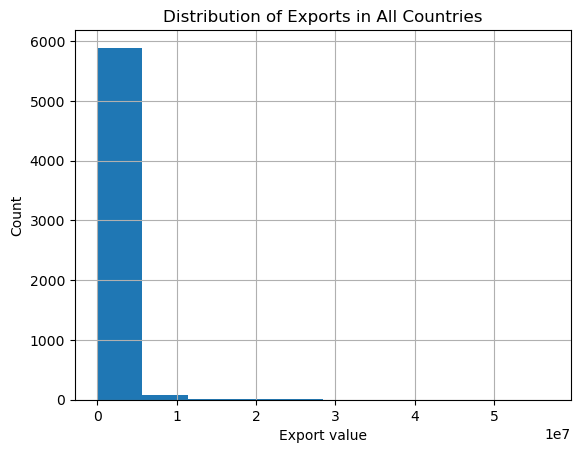

In [11]:
#Create an Histogram of Exports
df['Export value'].hist()
# Add labels and title
plt.xlabel('Export value')
plt.ylabel('Count')
plt.title('Distribution of Exports in All Countries')

# Show the plot
plt.show()

In [ ]:
#The values seem to lie within a certain range we have to introduce percentile in order to capture where most values lie. 

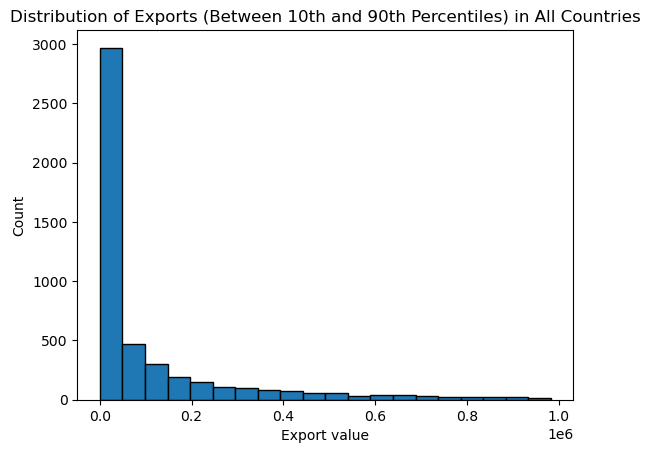

In [10]:
import matplotlib.pyplot as plt
import plotly.express as px
# Calculate percentiles
lower_percentile = df['Export value'].quantile(0.10)
upper_percentile = df['Export value'].quantile(0.90)

# Filter data within percentiles
filtered_df = df[(df['Export value'] >= lower_percentile) & (df['Export value'] <= upper_percentile)]

# Create histogram for filtered data
plt.hist(filtered_df['Export value'], bins=20, edgecolor='black')

# Add labels and title
plt.xlabel('Export value')
plt.ylabel('Count')
plt.title('Distribution of Exports (Between 10th and 90th Percentiles) in All Countries')

# Show the plot
plt.show()

In [ ]:
#Scatter plot of Exports vs Year
plt.scatter(df['YearCode'] , df['Export value'])
# Add labels and title
plt.xlabel('Year')
plt.ylabel('Exports')
plt.title('Distribution Of Exports Over The Years')

# Show the plot
plt.show()

In [ ]:
#Count lets create a column to count top countries and total exported value per year.
df3 = df[["Export Country", "Export value", "YearCode"]]
df3.sort_values(by="Export value", ascending=False)

In [ ]:
#Top 10 countries by export and year with highest exports. 
df3.tail(10)

In [ ]:
df['Export value'].describe()

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# split data into train/test sets
# Define the features and target

features = ['YearCode', 'Export Country']
target = 'Export value'

X = df[features]  # features
y = df[target]    # target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a ColumnTransformer to handle the OneHotEncoder
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(handle_unknown='ignore'), ['Export Country'])
    ],
    remainder='passthrough'
)

# Create the pipeline
model = make_pipeline(
    ct,
    SimpleImputer(),
    Ridge()
)

# Fit the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

NameError: name 'make_pipeline' is not defined

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
features = ['YearCode', 'Export Country']
target = 'Export value'

X = df[features]
y = df[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a ColumnTransformer to handle the OneHotEncoder and StandardScaler
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(handle_unknown='ignore'), ['Export Country']),
        ('scaler', StandardScaler(), ['YearCode'])
    ],
    remainder='passthrough'
)

# Create the pipeline with Ridge regression
model = make_pipeline(
    ct,
    SimpleImputer(),
    Ridge()
)

# Define a range of alpha values to test
param_grid = {'ridge__alpha': [0.1, 1.0, 10.0, 100.0]}

# Perform Grid Search to find the best alpha
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameter
best_alpha = grid_search.best_params_['ridge__alpha']

# Refit the model with the best alpha
model.set_params(ridge__alpha=best_alpha)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


Mean Squared Error: 1152024962183.616
R-squared: 0.5025094848508465


In [15]:
y_test_pred = pd.Series(model.predict(X_test))
y_test_pred.head()

0   -2.175460e+05
1    2.861961e+05
2   -5.473546e+04
3    2.330739e+06
4    5.380563e+05
dtype: float64